In [113]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import lossy_modes

In [114]:
n_jct = 80
lj = 1.9
cj = 40e-6
cg = 4e-8
ct = 1e-5

w_p,w_g,w_t = 1/np.sqrt(lj*cj), 1/np.sqrt(lj*cg), 1/np.sqrt(lj*ct)
print(f"n_jct : {n_jct}\nlj : {lj}\ncj : {cj} | f_p : {w_p/2/np.pi}\ncg : {cg} | f_g : {w_g/2/np.pi}\nct : {ct} | f_t : {w_t/2/np.pi}")
print(f"Predicted f0 : {1/np.sqrt(n_jct*lj*ct)/2/np.pi}")

n_jct : 80
lj : 1.9
cj : 4e-05 | f_p : 18.256324034277334
cg : 4e-08 | f_g : 577.3156565039027
ct : 1e-05 | f_t : 36.51264806855467
Predicted f0 : 4.082238155990732


In [115]:
modes_av = lossy_modes.Array(n_jct,[lj,cj,0,np.inf,cg,np.inf,ct])
freqs_bare = modes_av.get_bare_modes()
modes_av.resonator_correction()
freqs_v0 = modes_av.get_resonator_modes()
print(f"\nMode V0 : {freqs_v0[0]}")

Resonators Q are under evaluated, calculation to modify

Mode V0 : 1.140935702350777


C:\Users\rroussea\Desktop\Work\JJarray_formal\lossy_modes.py:72: RuntimeWarning: divide by zero encountered in double_scalars
  return [(m / self._lj + wk ** 2 * (self._cg / 2 + self._cj * m)) / (2 * wk * (


In [194]:
def left(w):
    frac = (2*w*w_g*w_t**2*np.sqrt(1-w**2/w_p**2))/ (w_t**4 *(1-w**2/w_p**2) - w**2*w_g**2)
    frac = 0*w
    return np.arctan(frac)
right = lambda w : n_jct*w/(w_g*np.sqrt(1-w**2/w_p**2))

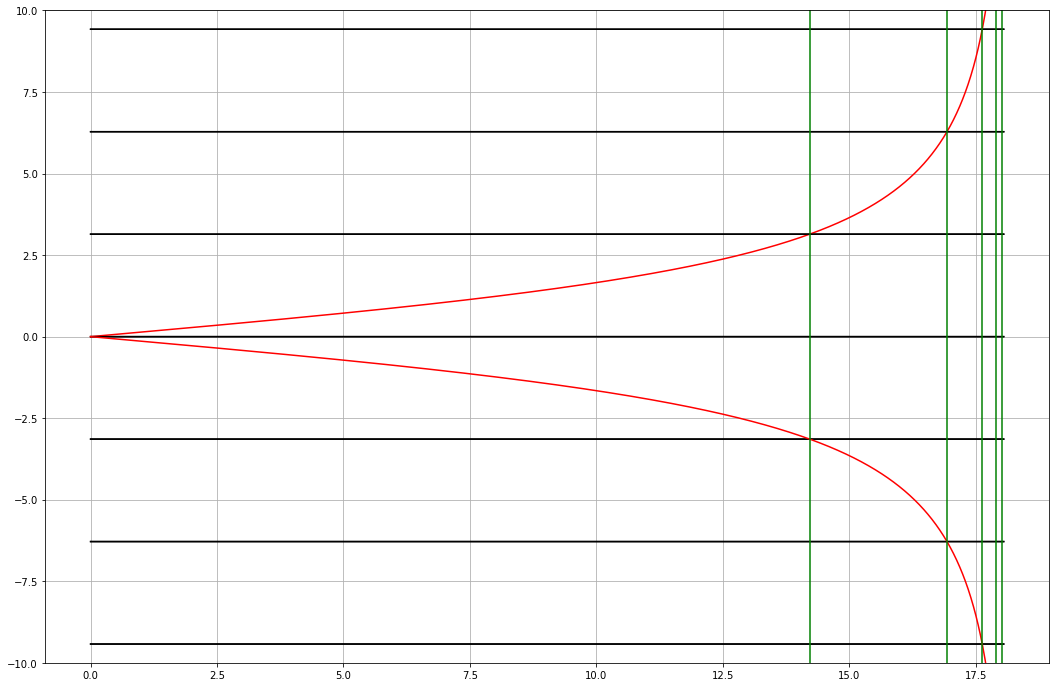

In [198]:
min_plt,max_plt = 0, 1/np.sqrt(lj*cj)/2/np.pi-0.2
#min_plt,max_plt = -0.2, 0.2
xs = np.linspace(min_plt, max_plt, 2000)*2*np.pi
fig,ax = plt.subplots(figsize=(18,12))
for i in range(2):
    right_plt = right(xs*(-1)**i)
    left_plt = left(xs*(-1)**i)
    for n in range(-10,10):
        ax.plot(xs/2/np.pi,left_plt+n*np.pi*(-1)**i,"black")
    ax.plot(xs/2/np.pi,right_plt,"red",label = "right")
    max_r = np.max(np.abs(right_plt))

for f in freqs_bare[:20]:
    if min_plt < f < max_plt: ax.plot([f, f], [-max_r, max_r],"green")

# for f in eigen_resonator():
#     if min_plt < f < max_plt: ax.plot([f, f], [-max_r, max_r],"blue")

ax.set_ylim([-10,10])
#ax.legend()
ax.grid()

In [201]:
zs = lambda w: 1j*lj*w/(1-lj*cj*w**2)
yg = lambda w: 1j*cj*w
zt = lambda w: 1/(1j*ct*w)

zl = lambda w: np.sqrt(zs(w)/yg(w))
k = lambda w: -1j*np.sqrt(zs(w)*yg(w))
#zin = lambda w: zl(w)*(zt(w) + zl(w)*np.tanh(jk(w)*n_jct/2/1j))/(zl(w) + zt(w)*np.tan(jk(w)*n_jct/2/1j))
zin = lambda w: 1j*zl(w)*np.tanh(k(w)*80/2)

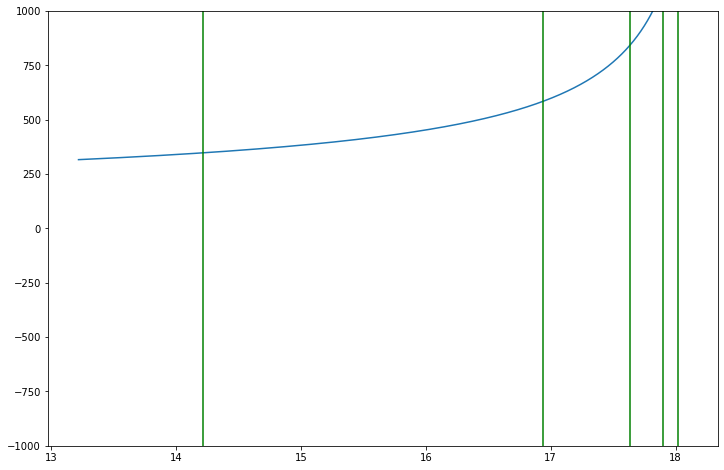

In [202]:
min_plt, max_plt = freqs_bare[0]-1,freqs_bare[5]
max_r = 1e3

fig,ax = plt.subplots(figsize=(12,8))
ws = np.linspace(min_plt, max_plt, 10000)*2*np.pi
plt.plot(ws/2/np.pi, np.imag(zin(ws)))

for f in freqs_bare[:20]:
    if min_plt < f < max_plt: ax.plot([f, f], [-max_r, max_r],"green")

plt.ylim([-max_r, max_r])
plt.show()

# Method V2

In [6]:
n_jct = 80
lj = 1.9
cj = 40e-6
cg = 4e-8
ct = 1e-5

In [7]:
zs = lambda w: 1j*lj*w/(1-lj*cj*w**2)
yg = lambda w: 1j*cj*w
zt = lambda w: 1/(1j*ct*w)

#ik = lambda w: np.arccos(((np.real(zs(w)*yg(w))/2+1)+1)%2-1)
ik = lambda w: np.arccos(zs(w)*yg(w)/2+1)
zl = lambda w: np.sqrt(zs(w)/yg(w))*np.exp(-ik(w)/2)
def z_in(w):
    _ik = ik(w)
    _zl = np.sqrt(zs(w)/yg(w))*np.exp(_ik/2)
    _zt = zt(w)
    return np.angle(((_zt - _zl)/(_zt + _zl)*np.exp(_ik*n_jct))**2)

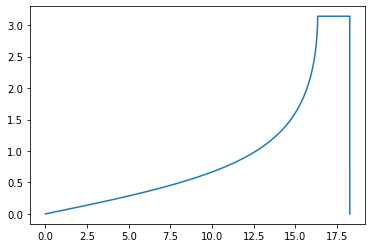

In [8]:
min_plt,max_plt = 0,1/np.sqrt(lj*cj)/2/np.pi
ws = np.linspace(min_plt, max_plt, 10000)*2*np.pi
plt.plot(ws/2/np.pi, np.real(ik(ws)))

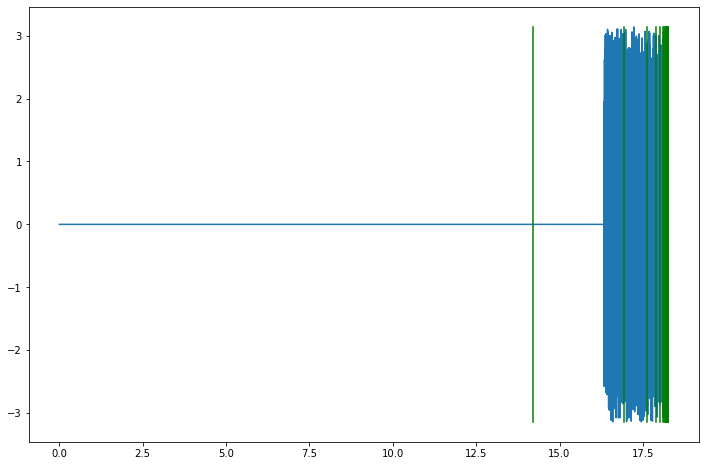

In [121]:
min_plt,max_plt = 0.001,1/np.sqrt(lj*cj)/2/np.pi
ws = np.linspace(min_plt, max_plt, 10000)*2*np.pi
fig,ax = plt.subplots(figsize=(12,8))
plt.plot(ws/2/np.pi,np.real(z_in(ws)))
for f in freqs_bare:
    if min_plt < f < max_plt: ax.plot([f, f], [-np.pi, np.pi],"green")

C:\Users\rroussea\AppData\Local\Temp/ipykernel_12016/2146076445.py:3: RuntimeWarning: divide by zero encountered in true_divide
  zt = lambda w: 1/(1j*ct*w)
C:\Users\rroussea\AppData\Local\Temp/ipykernel_12016/2146076445.py:3: RuntimeWarning: invalid value encountered in true_divide
  zt = lambda w: 1/(1j*ct*w)
C:\Users\rroussea\AppData\Local\Temp/ipykernel_12016/2146076445.py:6: RuntimeWarning: invalid value encountered in true_divide
  zl = lambda w: np.sqrt(zs(w)/yg(w))*np.exp(-ik(w)/2)
C:\Users\rroussea\AppData\Local\Temp/ipykernel_12016/3455082743.py:2: RuntimeWarning: invalid value encountered in true_divide
  func = np.angle((zt(xs) - zl(xs))/(zt(xs) + zl(xs)))


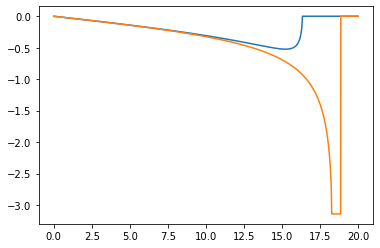

In [30]:
xs = np.linspace(0,20,5000)*2*np.pi
func = np.angle((zt(xs) - zl(xs))/(zt(xs) + zl(xs)))
func_cont = np.angle((zt(xs) - np.sqrt(zs(xs)/yg(xs)))/(zt(xs) + np.sqrt(zs(xs)/yg(xs))))
plt.plot(xs/2/np.pi,func)
plt.plot(xs/2/np.pi,func_cont)

# Article method verification

In [22]:
n_jct = 80
lj = 1.9
cj = 40e-6
cg = 4e-8
ct = 3e-6

w_p,w_g,w_t = 1/np.sqrt(lj*cj), 1/np.sqrt(lj*cg), 1/np.sqrt(lj*ct)
print(f"n_jct : {n_jct}\nlj : {lj}\ncj : {cj} | f_p : {w_p/2/np.pi}\ncg : {cg} | f_g : {w_g/2/np.pi}\nct : {ct} | f_t : {w_t/2/np.pi}")
print(f"Predicted f0 : {1/np.sqrt(n_jct*lj*ct)/2/np.pi}")

n_jct : 80
lj : 1.9
cj : 4e-05 | f_p : 18.256324034277334
cg : 4e-08 | f_g : 577.3156565039027
ct : 3e-06 | f_t : 66.66266993798276
Predicted f0 : 7.453113077148055


In [7]:
modes_av = lossy_modes.Array(n_jct,[lj,cj,0,np.inf,cg,np.inf,ct])
freqs_bare = modes_av.get_bare_modes()
modes_av.resonator_correction()
freqs_v0 = modes_av.get_resonator_modes()
print(f"\nMode V0 : {freqs_v0[0]}")

Resonators Q are under evaluated, calculation to modify

Mode V0 : 2.070245138768594


C:\Users\rroussea\Desktop\Work\JJarray_formal\lossy_modes.py:72: RuntimeWarning: divide by zero encountered in double_scalars
  return [(m / self._lj + wk ** 2 * (self._cg / 2 + self._cj * m)) / (2 * wk * (


In [8]:
lk = lambda k: lj/(1-np.cos(k))
ck = lambda k: cg/2 + cj*(1-np.cos(k))
zk = lambda k: np.sqrt(lk(k)/ck(k))/2
fk = lambda k: 1/np.sqrt(lk(k)*ck(k))/2/np.pi
zl = lambda k: 1/(1j*ct*2*np.pi*fk(k))
z_in_open = lambda k: zk(k)/1j/np.tan(k*n_jct/2)
z_in_load = lambda k: zk(k)*(zl(k)+1j*zk(k)*np.tan(k*n_jct/2))/(zk(k) + 1j*zl(k)*np.tan(k*n_jct/2))

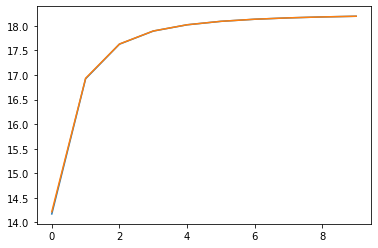

In [9]:
n_pts = 10000
k_val = np.linspace(0,np.pi,n_pts)[1:]
z_in_open_val = np.imag(z_in_open(k_val))
sgn = np.sign(z_in_open_val)
f_roots = [fk(k_val[i]) for i,test in enumerate(sgn[:-1]*sgn[1:] == -1) if test]
plt.plot(f_roots[:10])
plt.plot(freqs_bare[:10])

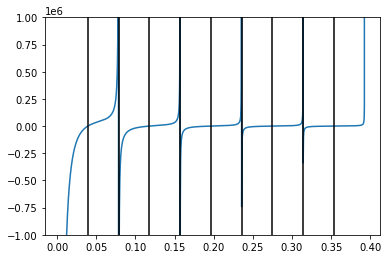

In [10]:
min_plt, max_plt = np.pi/n_jct*0.1, np.pi/n_jct*10
k_val = np.linspace(min_plt,max_plt,2000)
ploted = np.imag(z_in_open(k_val))
plt.plot(k_val,ploted)
min_p,max_p = np.min(ploted),np.max(ploted)
plt.ylim([-1e6,1e6])
for n in range(10):
    pos = np.pi*n/80
    if min_plt < pos < max_plt: plt.plot([pos,pos],[min_p,max_p],"black")

In [11]:
k_ret = lambda w: np.arccos(1-lj*cg/(2/w**2 - 2*lj*cj))

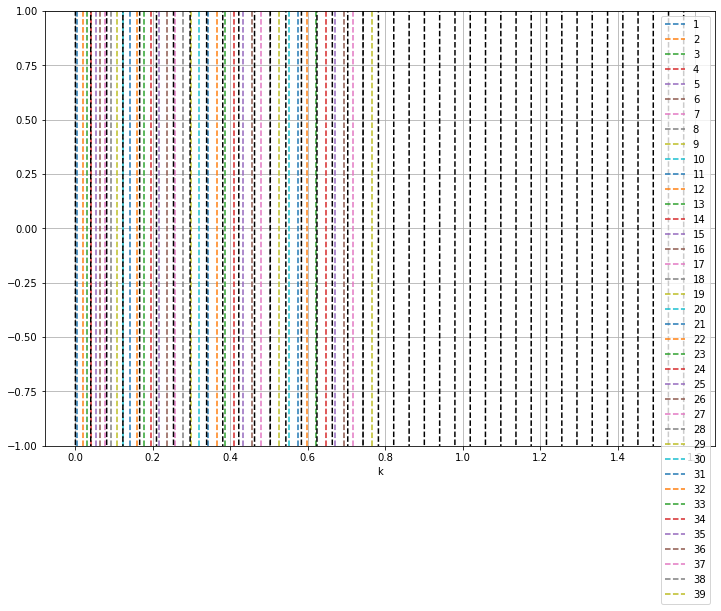

In [12]:
fig,ax = plt.subplots(figsize=(12,8))
k_val = np.linspace(0,np.pi,n_pts)[1:]

min_p,max_p = -1,1
for i,f in enumerate(freqs_v0):
    k_eq = np.real(k_ret(f*2*np.pi))
    if 0 < k_eq < np.pi: ax.plot([k_eq, k_eq], [min_p, max_p],"--",label=f"{i+1}")

z_in_load_val = np.imag(z_in_load(k_val))
ax.plot(k_val[:n_pts//2],z_in_load_val[:n_pts//2],'--',color="black")

#min_p,max_p = np.min(ploted),np.max(ploted)

ax.set_ylim([min_p,max_p])
ax.set_xlabel("k")
ax.grid()
ax.legend()

In [13]:
sgn = np.sign(z_in_load_val)
f_roots = [fk(k_val[i]) for i,test in enumerate(sgn[:-1]*sgn[1:] == -1) if test]

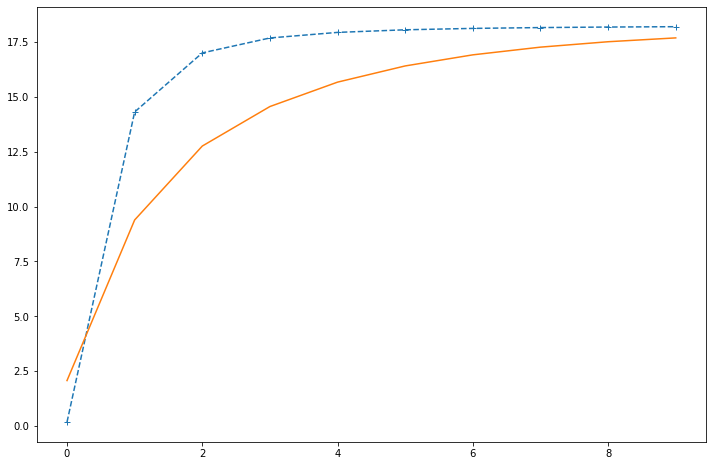

In [14]:
fig,ax = plt.subplots(figsize = (12,8))
plt.plot(f_roots[:10],"+--")
plt.plot(freqs_v0[:10])

# Compare to article

In [15]:
def plot_vs_article(_freqs_V0, _n_jct=80, _lj=1.9, _cj=40e-6, _cg=4e-8, _ct=1e-6, _max_plt=10, _n_pts=10000):
    _lk = lambda k: _lj/(1-np.cos(k))
    _ck = lambda k: _cg/2 + _cj*(1-np.cos(k))
    _zk = lambda k: np.sqrt(_lk(k)/_ck(k))/2
    _fk = lambda k: 1/np.sqrt(_lk(k)*_ck(k))/2/np.pi
    _zl = lambda k: 1/(1j*_ct*2*np.pi*_fk(k))
    _z_in_open = lambda k: np.imag(zk(k)/(1j*np.tan(k*_n_jct/2)))
    _z_in_short = lambda k: zk(k)*np.tan(k*_n_jct/2)
    _z_in_load = lambda k: np.imag(_zk(k)*(_zl(k)+1j*_zk(k)*np.tan(k*_n_jct/2))/(_zk(k) + 1j*_zl(k)*np.tan(k*_n_jct/2)))

    _k_val = np.linspace(0,np.pi,_n_pts)[1:]
    _z_in_load_val = _z_in_load(_k_val)
    _z_in_open_val = _z_in_open(_k_val)
    _z_in_short_val = _z_in_short(_k_val)

    _sgn = np.sign(_z_in_open_val)
    _f_roots_o = [_fk(_k_val[ind]) for ind,test in enumerate(_sgn[:-1]*_sgn[1:] == -1) if test]

    _sgn = np.sign(_z_in_short_val)
    _f_roots_s = [_fk(_k_val[ind]) for ind,test in enumerate(_sgn[:-1]*_sgn[1:] == -1) if test]

    _sgn = np.sign(_z_in_load_val)
    _f_roots = [_fk(_k_val[ind]) for ind,test in enumerate(_sgn[:-1]*_sgn[1:] == -1) if test]

    fig,ax = plt.subplots(figsize = (12,8))
    ax.plot(_freqs_V0[:_max_plt],"+--",label="Article")
    ax.plot(_f_roots[:_max_plt],"+--",label="Corrected")
    ax.plot(_f_roots_o[:_max_plt],"+--",label="Open")
    ax.plot(_f_roots_s[:_max_plt],"+--",label="Short")
    ax.legend()
    ax.grid()
    plt.show()

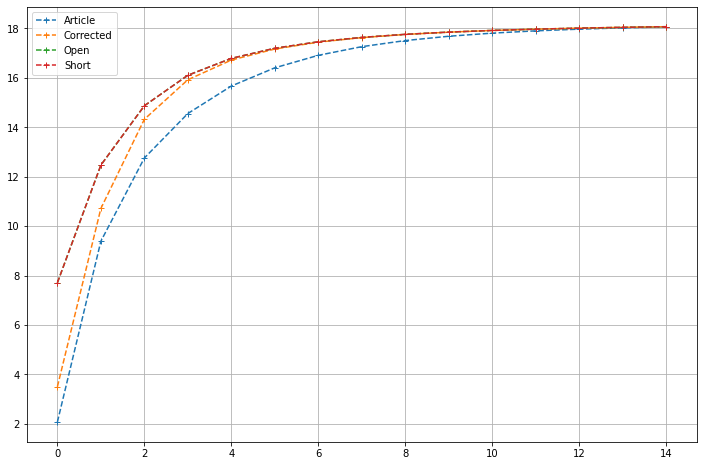

In [16]:
plot_vs_article(freqs_v0,_ct=3.71e-7,_cg =2.8e-7 ,_n_jct = 80,_max_plt=15)

## Use $Z_k = \sqrt{\frac{L_k}{C_k}}$

In [850]:
def plot_vs_article(_freqs_V0, _n_jct=80, _lj=1.9, _cj=40e-6, _cg=4e-8, _ct=1e-6, _max_plt=10, _n_pts=10000):
    _lk = lambda k: _lj/(1-np.cos(k))
    _ck = lambda k: _cg/2 + _cj*(1-np.cos(k))
    _zk = lambda k: np.sqrt(_lk(k)/_ck(k)) ###################
    _fk = lambda k: 1/np.sqrt(_lk(k)*_ck(k))/2/np.pi
    _zl = lambda k: 1/(1j*_ct*2*np.pi*_fk(k))
    _z_in_open = lambda k: np.imag(zk(k)/(1j*np.tan(k*_n_jct/2)))
    _z_in_short = lambda k: zk(k)*np.tan(k*_n_jct/2)
    _z_in_load = lambda k: np.imag(_zk(k)*(_zl(k)+1j*_zk(k)*np.tan(k*_n_jct/2))/(_zk(k) + 1j*_zl(k)*np.tan(k*_n_jct/2)))

    _k_val = np.linspace(0,np.pi,_n_pts)[1:]
    _z_in_load_val = _z_in_load(_k_val)
    _z_in_open_val = _z_in_open(_k_val)
    _z_in_short_val = _z_in_short(_k_val)

    _sgn = np.sign(_z_in_open_val)
    _f_roots_o = [_fk(_k_val[ind]) for ind,test in enumerate(_sgn[:-1]*_sgn[1:] == -1) if test]

    _sgn = np.sign(_z_in_short_val)
    _f_roots_s = [_fk(_k_val[ind]) for ind,test in enumerate(_sgn[:-1]*_sgn[1:] == -1) if test]

    #plt.plot(_z_in_load_val[:100])
    _sgn = np.sign(_z_in_load_val)
    _f_roots = [_fk(_k_val[ind]) for ind,test in enumerate(_sgn[:-1]*_sgn[1:] == -1) if test]

    fig,ax = plt.subplots(figsize = (12,8))
    ax.plot(_freqs_V0[:_max_plt],"+--",label="Article")
    ax.plot(_f_roots[:_max_plt],"+--",label="Corrected")
    #ax.plot(_f_roots_o[:_max_plt],"+--",label="Open")
    #ax.plot(_f_roots_s[:_max_plt],"+--",label="Short")
    ax.legend()
    ax.grid()
    plt.show()

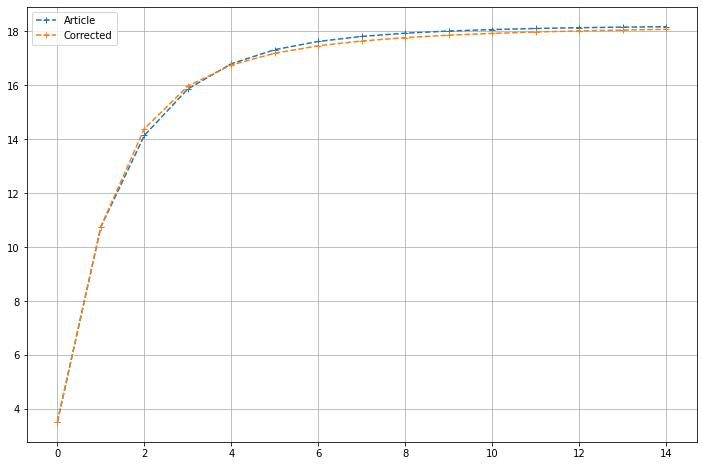

In [862]:
plot_vs_article(freqs_v0,_ct=1.85e-7,_cg =2.73e-7 ,_n_jct = 80,_max_plt=15)

In [18]:
def eigen_resonator(_n_jct=80, _lj=1.9, _cj=40e-6, _cg=4e-8, _ct=1e-6, _n_pts=10000):
    _lk = lambda k: _lj / (1 - np.cos(k))
    _ck = lambda k: _cg / 2 + _cj * (1 - np.cos(k))
    _zk = lambda k: np.sqrt(_lk(k) / _ck(k)) / 2
    _fk = lambda k: 1 / np.sqrt(_lk(k) * _ck(k)) / 2 / np.pi
    _zl = lambda k: 1 / (1j * _ct * 2 * np.pi * _fk(k))
    _z_in_load = lambda k: np.imag(
        _zk(k) * (_zl(k) + 1j * _zk(k) * np.tan(k * _n_jct / 2)) / (_zk(k) + 1j * _zl(k) * np.tan(k * _n_jct / 2)))
    _k_val = np.linspace(0, np.pi, _n_pts)[1:]
    _z_in_load_val = _z_in_load(_k_val)
    _sgn = np.sign(_z_in_load_val)
    _f_roots = [_fk(_k_val[ind]) for ind, test in enumerate(_sgn[:-1] * _sgn[1:] == -1) if test]
    return _f_roots

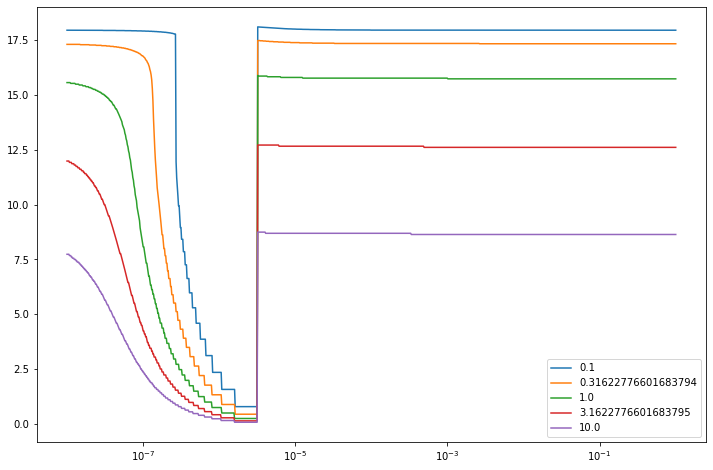

In [894]:
fig,ax= plt.subplots(figsize=(12,8))
ct_vals = np.logspace(-8,0,1000)
for ljv in np.logspace(-1,1,5):
    fund = []
    for ctv in ct_vals:
        fund.append(eigen_resonator(_ct=ctv, _lj=ljv, _cj=(1.9*40e-6)/ljv)[0])
    plt.plot(ct_vals,fund,label=str(ljv))
plt.xscale("log")
plt.legend()
plt.show()

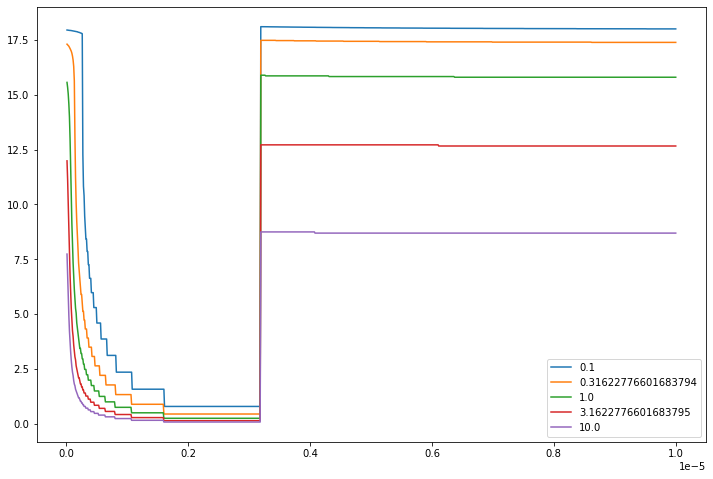

In [898]:
fig,ax= plt.subplots(figsize=(12,8))
ct_vals = np.linspace(1e-8,1e-5,1000)
for ljv in np.logspace(-1,1,5):
    fund = []
    for ctv in ct_vals:
        fund.append(eigen_resonator(_ct=ctv, _lj=ljv, _cj=(1.9*40e-6)/ljv)[0])
    plt.plot(ct_vals,fund,label=str(ljv))
plt.legend()
plt.show()

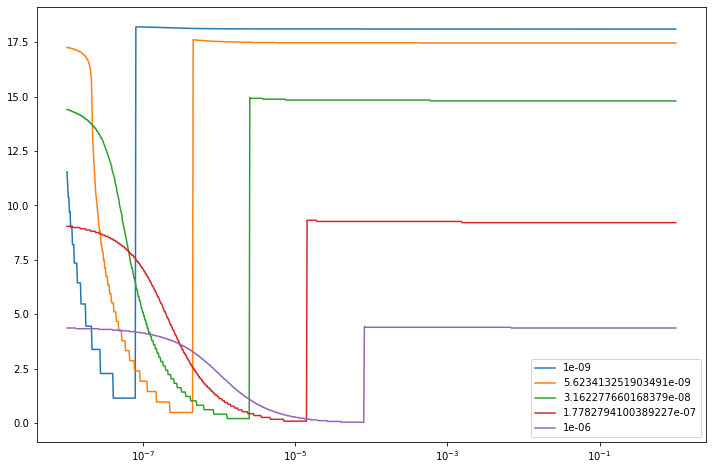

In [895]:
fig,ax= plt.subplots(figsize=(12,8))
ct_vals = np.logspace(-8,0,1000)
for cgv in np.logspace(-9,-6,5):
    fund = []
    for ctv in ct_vals:
        fund.append(eigen_resonator(_ct=ctv, _cg=cgv)[0])
    plt.plot(ct_vals,fund,label=str(cgv))
plt.xscale("log")
plt.legend()
plt.show()

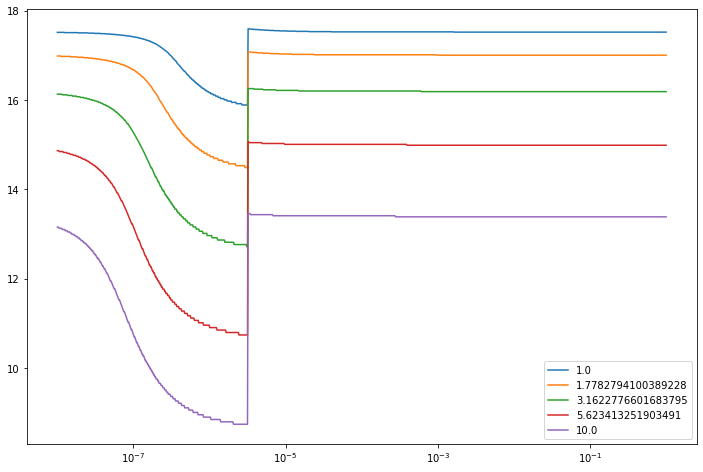

In [899]:
fig, ax = plt.subplots(figsize=(12, 8))
ct_vals = np.logspace(-8, 0, 1000)
for ljv in np.logspace(0, 1, 5):
    fund = []
    for ctv in ct_vals:
        fund.append(eigen_resonator(_ct=ctv, _lj=ljv, _cj=(1.9 * 40e-6) / ljv)[1])
    plt.plot(ct_vals, fund, label=str(ljv))
plt.xscale("log")
plt.legend()
plt.show()

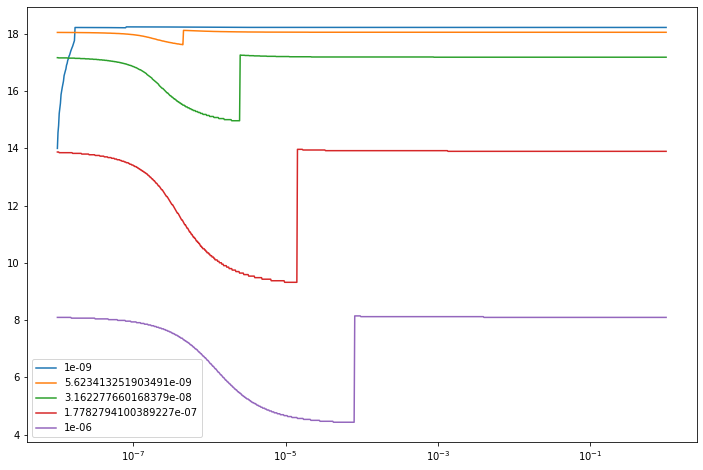

In [897]:
fig, ax = plt.subplots(figsize=(12, 8))
ct_vals = np.logspace(-8, 0, 1000)
for cgv in np.logspace(-9, -6, 5):
    fund = []
    for ctv in ct_vals:
        fund.append(eigen_resonator(_ct=ctv, _cg=cgv)[1])
    plt.plot(ct_vals, fund, label=str(cgv))
plt.xscale("log")
plt.legend()
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

ModuleNotFoundError: No module named 'ipympl'

In [272]:
n_jct = 80
lj = 1.9
cj = 40e-6
cg = 2e-7
ct = 3e-4

In [273]:
1/np.sqrt(lj*cj)/2/np.pi

18.256324034277334

In [274]:
zs = lambda w: 1j*lj*w/(1-lj*cj*w**2)
yg = lambda w: 1j*cg*w
zt = lambda w: 1/(1j*ct*w)

C:\Users\rroussea\AppData\Local\Temp/ipykernel_4152/320125303.py:3: RuntimeWarning: invalid value encountered in true_divide
  zl = lambda w: np.sqrt(zs(w)/yg(w)*np.exp(1j*gamma(w)))
C:\Users\rroussea\AppData\Local\Temp/ipykernel_4152/1507899368.py:3: RuntimeWarning: divide by zero encountered in true_divide
  zt = lambda w: 1/(1j*ct*w)
C:\Users\rroussea\AppData\Local\Temp/ipykernel_4152/320125303.py:4: RuntimeWarning: invalid value encountered in multiply
  z_in = lambda w: zl(w)*(zt(w)+1j*zl(w)*np.tan(gamma(w)*n_jct/2))/(zl(w)+1j*zt(w)*np.tan(gamma(w)*n_jct/2))
C:\Users\rroussea\AppData\Local\Temp/ipykernel_4152/320125303.py:4: RuntimeWarning: invalid value encountered in true_divide
  z_in = lambda w: zl(w)*(zt(w)+1j*zl(w)*np.tan(gamma(w)*n_jct/2))/(zl(w)+1j*zt(w)*np.tan(gamma(w)*n_jct/2))
C:\Users\rroussea\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=orde

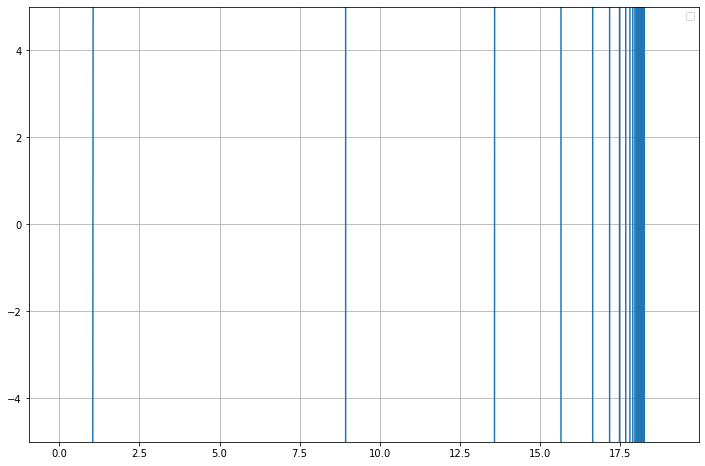

In [275]:
gamma = lambda w: np.arccos(zs(w)*yg(w)/2+1)
#zl = lambda w: np.sqrt(zs(w)/(1-np.exp(-1j*gamma(w))))
zl = lambda w: np.sqrt(zs(w)/yg(w)*np.exp(1j*gamma(w)))
z_in = lambda w: zl(w)*(zt(w)+1j*zl(w)*np.tan(gamma(w)*n_jct/2))/(zl(w)+1j*zt(w)*np.tan(gamma(w)*n_jct/2))
fig,ax = plt.subplots(figsize = (12,8))
ws = np.linspace(0,19,100000, dtype=complex)*2*np.pi
#plt.plot(ws/2/np.pi,np.imag(zl(ws)),label="discret")
#plt.plot(ws/2/np.pi,zl_2(ws))
z_in_im_vals = np.imag(z_in(ws))
plt.plot(ws/2/np.pi,z_in_im_vals)


for i in range(n_jct):
    fi = i/(2*n_jct*np.sqrt(lj*cg))
    #plt.plot([fi,fi],[-1e10,1e10],"--",color="green",linewidth=0.5)

plt.ylim([-5,5])
plt.legend()
plt.grid()
plt.show()

(8.935219352193522+0j)


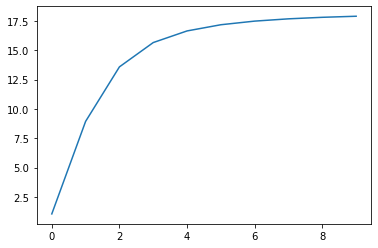

In [276]:
sgn = np.sign(z_in_im_vals)
f_roots = [ws[ind]/2/np.pi for ind, test in enumerate(sgn[:-1] * sgn[1:] == -1) if test]
plt.plot(f_roots[:10])
print(f_roots[1])

C:\Users\rroussea\AppData\Local\Temp/ipykernel_4152/3640129797.py:2: RuntimeWarning: invalid value encountered in true_divide
  zl_2 = lambda w: np.sqrt(zs(w)/yg(w))
C:\Users\rroussea\AppData\Local\Temp/ipykernel_4152/1507899368.py:3: RuntimeWarning: divide by zero encountered in true_divide
  zt = lambda w: 1/(1j*ct*w)
C:\Users\rroussea\AppData\Local\Temp/ipykernel_4152/1507899368.py:3: RuntimeWarning: invalid value encountered in true_divide
  zt = lambda w: 1/(1j*ct*w)
C:\Users\rroussea\AppData\Local\Temp/ipykernel_4152/3640129797.py:3: RuntimeWarning: overflow encountered in tanh
  z_in_2 = lambda w: zl_2(w)*(zt(w)+zl_2(w)*np.tanh(gamma_2(w)*n_jct/2))/(zl_2(w)+zt(w)*np.tanh(gamma_2(w)*n_jct/2))
C:\Users\rroussea\AppData\Local\Temp/ipykernel_4152/3640129797.py:3: RuntimeWarning: invalid value encountered in multiply
  z_in_2 = lambda w: zl_2(w)*(zt(w)+zl_2(w)*np.tanh(gamma_2(w)*n_jct/2))/(zl_2(w)+zt(w)*np.tanh(gamma_2(w)*n_jct/2))


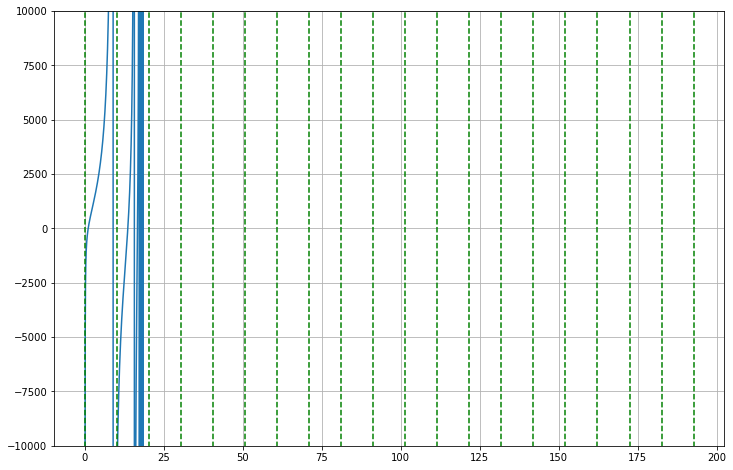

In [277]:
gamma_2 = lambda w: np.sqrt(zs(w)*yg(w))
zl_2 = lambda w: np.sqrt(zs(w)/yg(w))
z_in_2 = lambda w: zl_2(w)*(zt(w)+zl_2(w)*np.tanh(gamma_2(w)*n_jct/2))/(zl_2(w)+zt(w)*np.tanh(gamma_2(w)*n_jct/2))
fig, ax = plt.subplots(figsize=(12, 8))
ws = np.linspace(0,19,100000, dtype=complex)*2*np.pi

z_in_2_im_val = np.imag(z_in_2(ws))
plt.plot(np.real(ws) / 2 / np.pi, z_in_2_im_val)

for i in range(20):
    fi = i/(2*n_jct*np.sqrt(lj*cg))
    plt.plot([fi,fi],[-1e10,1e10],"--",color="green")

plt.ylim([-1e4,1e4])
plt.grid()
plt.show()

C:\Users\rroussea\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


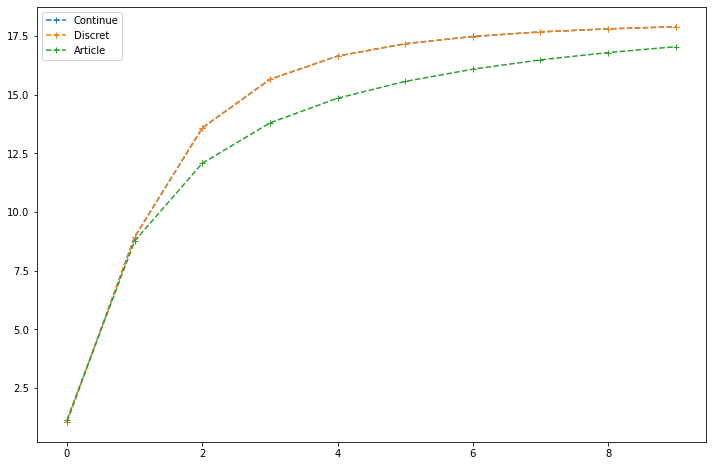

In [278]:

fig,ax = plt.subplots(figsize=(12,8))
sgn_2 = np.sign(z_in_2_im_val)
f_roots_2 = [ws[ind]/2/np.pi for ind, test in enumerate(sgn_2[:-1] * sgn_2[1:] == -1) if test]
plt.plot(f_roots_2[:10],"+--",label="Continue")
plt.plot(f_roots[:10],"+--",label="Discret")
plt.plot(freqs_v0[:10],"+--",label="Article")
plt.legend()